In [1]:
import pandas as pd
import pmagpy.ipmag as ipmag
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'viridis'
%matplotlib inline

/Users/Laurentia/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
GPMDB = pd.read_excel('gpmdb_beta_20150811.xlsx')

In [3]:
GPMDB_Australia = GPMDB.loc[GPMDB['CONTINENT']=='Australia']
GPMDB_Australia_50Ma = GPMDB_Australia.loc[GPMDB_Australia['HIGHAGE']<50]
GPMDB_Australia_50Ma.to_csv('GPMDB_Australia_50Ma.csv')
GPMDB_Australia_50Ma

,RESULTNO,COMPONENT,Mean_single,LOMAGAGE,HIMAGAGE,TESTS,TILT,SLAT,SLONG,B,...,STRUCTURE,ROCKUNIT.STATUS,REFNO,AUTHORS,YEAR,JOURNAL,VOLUME,VPAGES,TITLE,REMARKS
139,138,NaN,NaN,23,28,N,0,-38.4,144.3,20.0,...,NaN,NaN,1201,"Idnurm,M.",1985,Geophys.J.Roy.Astron.Soc.,83,399-418,Late Mesozoic and Cenozoic palaeomagnetism of ...,"5,5 Results"
140,139,NaN,NaN,10,14,N,0,-38.7,143.1,30.0,...,Essentially horizontal,NaN,1201,"Idnurm,M.",1985,Geophys.J.Roy.Astron.Soc.,83,399-418,Late Mesozoic and Cenozoic palaeomagnetism of ...,"5,5 Results"
141,140,NaN,1.0,2,4,Ro,0,-38.0,142.5,14.0,...,NaN,NaN,1201,"Idnurm,M.",1985,Geophys.J.Roy.Astron.Soc.,83,399-418,Late Mesozoic and Cenozoic palaeomagnetism of ...,"5,5 Results"
1155,1147,NaN,NaN,0,1,N,0,-38.0,140.7,2.0,...,NaN,NaN,1640,"Barbetti,M., Sheard,M.J.",1981,J.Geol.Soc.Austr.,28,385-394,Palaeomagnetic results from Mounts Gambier and...,"2,2 Results"
1156,1148,NaN,NaN,0,1,N,0,-38.0,140.7,1.0,...,NaN,NaN,1640,"Barbetti,M., Sheard,M.J.",1981,J.Geol.Soc.Austr.,28,385-394,Palaeomagnetic results from Mounts Gambier and...,"2,2 Results"
1161,1153,NaN,NaN,5,35,Ro,0,-36.1,149.1,2.0,...,NaN,NaN,1645,"Schmidt,P.W., Taylor,G., Walker,P.H.",1982,J.Geol.Soc.Austr.,29,49-53,Palaeomagnetic dating and stratigraphy of a Ca...,"1,1 Result"
1162,1154,NaN,NaN,8,23,"F-,Ro",0,-33.6,150.6,13.0,...,NaN,NaN,1646,"Bishop,P., Hunt,P., Schmidt,P.W.",1982,J.Geol.Soc.Austr.,29,319-326,"Limits to the age of the Lapstone Monocline, N...","1,1 Result"
1787,1769,NaN,NaN,46,48,M,0,-33.5,151.3,4.0,...,NaN,NaN,1936,"Embleton,B.J.J., Schmidt,P.W., Hamilton,L.H., ...",1985,"Publ.Geol.Soc.Aust.,N.S.W. Div.",1,59-72,Dating volcanism in the Sydney Basin: evidence...,"3,5 Results"
1835,1818,NaN,NaN,0,5,"Rb,M",0,-38.0,143.5,32.0,...,NaN,Superseded study,820,"Irving,E., Green,R.",1957,Mon.Not.Roy.Astron.Soc.Geophys.Suppl.,7,347-359,The palaeomagnetism of the Kainozoic basalts o...,"2,2 Results"
1875,1858,NaN,NaN,22,25,Rc,0,-27.0,152.2,12.0,...,NaN,Superseded study,333,"Robertson,W.A.",1966,Proc.Roy.Soc.Queensland,78,87-100,Palaeomagnetism of some Cainozoic igneous rock...,"1,1 Result"


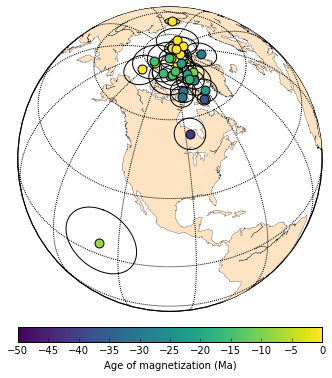

In [5]:
m = Basemap(projection='ortho',lat_0=45,lon_0=260,resolution='c',area_thresh=50000)
plt.figure(figsize=(6, 6))
m.drawcoastlines(linewidth=0.25)
m.fillcontinents(color='bisque',lake_color='white',zorder=1)
m.drawmapboundary(fill_color='white')
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))

for n in GPMDB_Australia_50Ma.index:
    pole = ipmag.plot_pole_colorbar(m,GPMDB_Australia_50Ma['PLONG'][n],
                             GPMDB_Australia_50Ma['PLAT'][n],
                             GPMDB_Australia_50Ma['DP'][n],
                             GPMDB_Australia_50Ma['DP'][n]
                             -GPMDB_Australia_50Ma['HIGHAGE'][n],
                             -50,0,markersize=80, color="k", alpha=1)
m.colorbar(pole,location='bottom',pad="5%",label='Age of magnetization (Ma)')
plt.show()